In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv')
test=pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv')
df=pd.concat([train.reset_index(drop=True),test.reset_index(drop=True)])
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [5]:
df.describe()

,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


Remaining All columns


In [6]:
df.rename(columns={"Model Name":"Model_Name","Screen Size":"Screen_Size","Operating System":"OS","Operating System Version":"OS_version"},inplace=True)
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [7]:
df.isnull().sum()

Manufacturer      0
Model_Name        0
Category          0
Screen_Size       0
Screen            0
CPU               0
RAM               0
 Storage          0
GPU               0
OS                0
OS_version      170
Weight            0
Price             0
dtype: int64

In [8]:
df['OS_version'].value_counts()

OS_version
10      1071
7         45
X          8
10 S       8
Name: count, dtype: int64

In [9]:
df['OS_version']=df['OS_version'].fillna(df['OS_version'].mode()[0])

In [10]:
df.isnull().sum()

Manufacturer    0
Model_Name      0
Category        0
Screen_Size     0
Screen          0
CPU             0
RAM             0
 Storage        0
GPU             0
OS              0
OS_version      0
Weight          0
Price           0
dtype: int64

In [11]:
for i in df.columns:
    print(df[[i]])

    Manufacturer
0          Apple
1          Apple
2             HP
3          Apple
4          Apple
..           ...
320       Lenovo
321       Lenovo
322       Lenovo
323           HP
324         Asus

[1302 rows x 1 columns]
                              Model_Name
0                            MacBook Pro
1                            Macbook Air
2                                 250 G6
3                            MacBook Pro
4                            MacBook Pro
..                                   ...
320                       Yoga 500-14ISK
321                       Yoga 900-13ISK
322                   IdeaPad 100S-14IBR
323  15-AC110nv (i7-6500U/6GB/1TB/Radeon
324  X553SA-XX031T (N3050/4GB/500GB/W10)

[1302 rows x 1 columns]
               Category
0             Ultrabook
1             Ultrabook
2              Notebook
3             Ultrabook
4             Ultrabook
..                  ...
320  2 in 1 Convertible
321  2 in 1 Convertible
322            Notebook
323           

In [12]:
df['OS_version'].value_counts()

OS_version
10      1241
7         45
X          8
10 S       8
Name: count, dtype: int64

In [13]:
def order(x,num):
    return df[x].value_counts().head(num).index

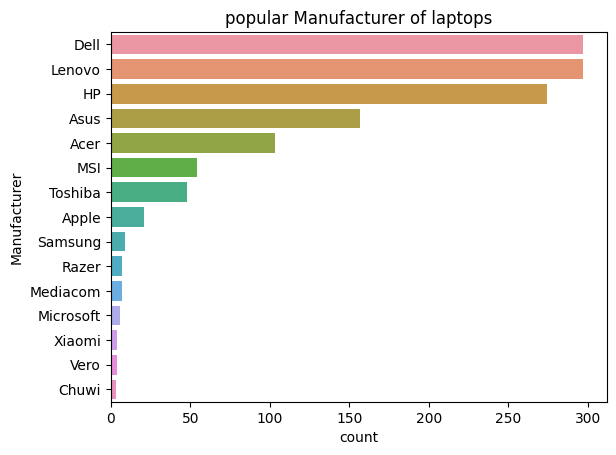

In [14]:
plt.title('popular Manufacturer of laptops')
sns.countplot(y=df['Manufacturer'],order=order('Manufacturer',15))
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Manufacturer']=lr.fit_transform(df['Manufacturer'])

In [16]:
print(lr.classes_)

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1302 non-null   int64  
 1   Model_Name    1302 non-null   object 
 2   Category      1302 non-null   object 
 3   Screen_Size   1302 non-null   object 
 4   Screen        1302 non-null   object 
 5   CPU           1302 non-null   object 
 6   RAM           1302 non-null   object 
 7    Storage      1302 non-null   object 
 8   GPU           1302 non-null   object 
 9   OS            1302 non-null   object 
 10  OS_version    1302 non-null   object 
 11  Weight        1302 non-null   object 
 12  Price         1302 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 142.4+ KB


In [18]:
df['Model_Name'].nunique()

617

In [19]:
df['Model_Name'].value_counts()

Model_Name
XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
SmartBook 130                            1
A541NA-GO342 (N3350/4GB/500GB/Linux)     1
17-X047na (i3-6006U/8GB/1TB/W10)         1
V310-15ISK (i5-6200U/4GB/1TB/FHD/No      1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
Name: count, Length: 617, dtype: int64

In [20]:
df.drop('Model_Name',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1302 non-null   int64  
 1   Category      1302 non-null   object 
 2   Screen_Size   1302 non-null   object 
 3   Screen        1302 non-null   object 
 4   CPU           1302 non-null   object 
 5   RAM           1302 non-null   object 
 6    Storage      1302 non-null   object 
 7   GPU           1302 non-null   object 
 8   OS            1302 non-null   object 
 9   OS_version    1302 non-null   object 
 10  Weight        1302 non-null   object 
 11  Price         1302 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 132.2+ KB


In [22]:
df['Category'].nunique()

6

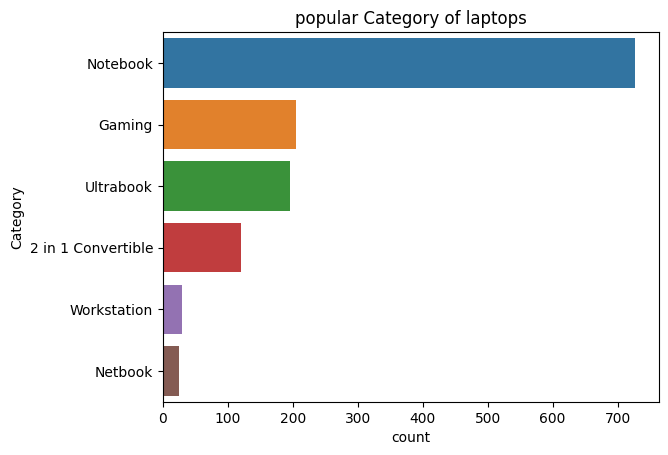

In [23]:
plt.title('popular Category of laptops')
sns.countplot(y=df['Category'],order=order('Category',15))
plt.show()

In [24]:
df['Category'].value_counts()

Category
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

In [25]:
df['Category'].replace({'Notebook':'Notebook'},inplace=True)

In [26]:
df['Category'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Category']=lr.fit_transform(df['Category'])

In [28]:
print(lr.classes_)

['2 in 1 Convertible' 'Gaming' 'Netbook' 'Notebook' 'Ultrabook'
 'Workstation']


In [29]:
df['Screen_Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [30]:
df['Screen_Size']=df['Screen_Size'].str.replace('"','').astype("float")


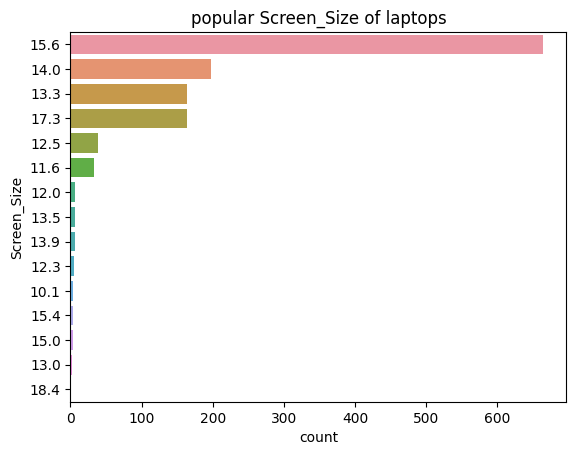

In [31]:
plt.title('popular Screen_Size of laptops')
sns.countplot(y=df['Screen_Size'],order=order('Screen_Size',15))
plt.show()

In [32]:
df['Screen'].value_counts()

Screen
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440        

In [33]:
df['Touchscreen']=df['Screen'].str.contains('Touchscreen',case=False).astype('int32')

In [34]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     191
Name: count, dtype: int64

In [35]:
df['IPS_panel']=df['Screen'].str.contains('IPS',case=False).astype('int32')

In [36]:
df['IPS_panel'].value_counts()

IPS_panel
0    937
1    365
Name: count, dtype: int64

In [37]:
df['Retina_Display']=df['Screen'].str.contains('Retina Display',case=False).astype('int32')

In [38]:
df['Retina_Display'].value_counts()

Retina_Display
0    1285
1      17
Name: count, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    1302 non-null   int64  
 1   Category        1302 non-null   int64  
 2   Screen_Size     1302 non-null   float64
 3   Screen          1302 non-null   object 
 4   CPU             1302 non-null   object 
 5   RAM             1302 non-null   object 
 6    Storage        1302 non-null   object 
 7   GPU             1302 non-null   object 
 8   OS              1302 non-null   object 
 9   OS_version      1302 non-null   object 
 10  Weight          1302 non-null   object 
 11  Price           1302 non-null   float64
 12  Touchscreen     1302 non-null   int32  
 13  IPS_panel       1302 non-null   int32  
 14  Retina_Display  1302 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(8)
memory usage: 147.5+ KB


In [40]:
df['full_hd_display']=df['Screen'].str.contains('Full HD' ,case=False).astype('int32')

In [41]:
df['full_hd_display'].value_counts()

full_hd_display
1    843
0    459
Name: count, dtype: int64

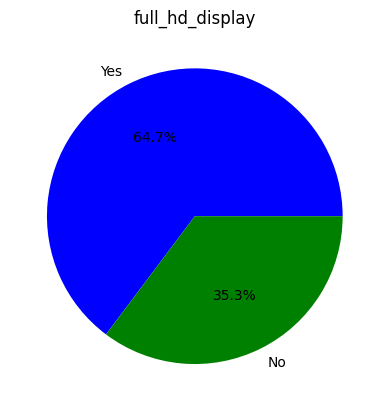

In [42]:
plt.title('full_hd_display')
plt.pie(df['full_hd_display'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['blue','green'])
plt.show()

In [43]:
df['Quad_HD+']=df['Screen'].str.contains('Quad HD',case=False).astype('int32')

In [44]:
df['Quad_HD+'].value_counts()

Quad_HD+
0    1272
1      30
Name: count, dtype: int64

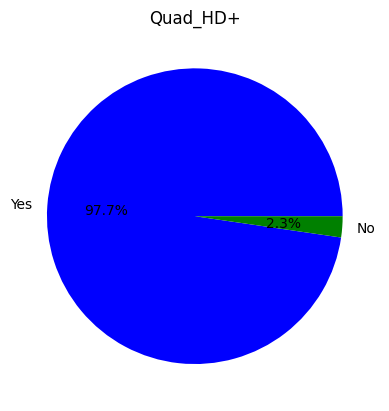

In [45]:
plt.title('Quad_HD+')
plt.pie(df['Quad_HD+'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['blue','green'])
plt.show()

In [46]:
df['xres']=df['Screen'].str.extract(r'(\d+)x\d+').astype('int32')
df['yres']=df['Screen'].str.extract(r'(\d+)x\d+').astype('int32')
df.drop('Screen',axis=1,inplace=True)

In [47]:
df['PPI']=(((df['xres']**2+df['yres']**2)**0.5)/df['Screen_Size'])

In [48]:
df['PPI']

0      272.209528
1      153.117859
2      174.057054
3      264.476303
4      272.209528
          ...    
320    193.949289
321    340.261910
322    137.986838
323    123.834341
324    123.834341
Name: PPI, Length: 1302, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   object 
 5    Storage         1302 non-null   object 
 6   GPU              1302 non-null   object 
 7   OS               1302 non-null   object 
 8   OS_version       1302 non-null   object 
 9   Weight           1302 non-null   object 
 10  Price            1302 non-null   float64
 11  Touchscreen      1302 non-null   int32  
 12  IPS_panel        1302 non-null   int32  
 13  Retina_Display   1302 non-null   int32  
 14  full_hd_display  1302 non-null   int32  
 15  Quad_HD+         1302 non-null   int32  
 16  xres             1302 non-null   int32  
 17  yres             130

In [50]:
df.drop(['xres','yres'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   object 
 5    Storage         1302 non-null   object 
 6   GPU              1302 non-null   object 
 7   OS               1302 non-null   object 
 8   OS_version       1302 non-null   object 
 9   Weight           1302 non-null   object 
 10  Price            1302 non-null   float64
 11  Touchscreen      1302 non-null   int32  
 12  IPS_panel        1302 non-null   int32  
 13  Retina_Display   1302 non-null   int32  
 14  full_hd_display  1302 non-null   int32  
 15  Quad_HD+         1302 non-null   int32  
 16  PPI              1302 non-null   float64
dtypes: float64(3), int32

In [52]:
df.head()

,Manufacturer,Category,Screen_Size,CPU,RAM,Storage,GPU,OS,OS_version,Weight,Price,Touchscreen,IPS_panel,Retina_Display,full_hd_display,Quad_HD+,PPI
0,1,4,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48,0,1,1,0,0,272.209528
1,1,4,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48,0,0,0,0,0,153.117859
2,7,3,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00,0,0,0,1,0,174.057054
3,1,4,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40,0,1,1,0,0,264.476303
4,1,4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20,0,1,1,0,0,272.209528


In [53]:
df['Weight']=df['Weight'].str.extract(r'(\d+\.?\d*)').astype('float')

In [54]:
df['Weight'].nunique()

171

In [55]:
df['Weight'].value_counts()

Weight
2.20    126
2.10     58
2.00     45
2.40     44
2.30     40
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64

In [56]:
n=df['GPU'].str.split('',n=1,expand=True)
n

,0,1
0,,Intel Iris Plus Graphics 640
1,,Intel HD Graphics 6000
2,,Intel HD Graphics 620
3,,AMD Radeon Pro 455
4,,Intel Iris Plus Graphics 650
...,...,...
320,,Intel HD Graphics 520
321,,Intel HD Graphics 520
322,,Intel HD Graphics
323,,AMD Radeon R5 M330


In [57]:
n=df['GPU'].str.split('',n=1,expand=True)
df['GPU']=n[0]
df['GPU'].value_counts()

GPU
    1302
Name: count, dtype: int64

In [58]:
lr=LabelEncoder()
df['GPU']=lr.fit_transform(df['GPU'])

In [59]:
df['RAM']=df['RAM'].str.replace('GB',"")
df['RAM']=df['RAM'].astype('int')                                

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   int64  
 5    Storage         1302 non-null   object 
 6   GPU              1302 non-null   int64  
 7   OS               1302 non-null   object 
 8   OS_version       1302 non-null   object 
 9   Weight           1302 non-null   float64
 10  Price            1302 non-null   float64
 11  Touchscreen      1302 non-null   int32  
 12  IPS_panel        1302 non-null   int32  
 13  Retina_Display   1302 non-null   int32  
 14  full_hd_display  1302 non-null   int32  
 15  Quad_HD+         1302 non-null   int32  
 16  PPI              1302 non-null   float64
dtypes: float64(4), int32

In [61]:
df

,Manufacturer,Category,Screen_Size,CPU,RAM,Storage,GPU,OS,OS_version,Weight,Price,Touchscreen,IPS_panel,Retina_Display,full_hd_display,Quad_HD+,PPI
0,1,4,13.3,Intel Core i5 2.3GHz,8,128GB SSD,0,macOS,10,1.37,11912523.48,0,1,1,0,0,272.209528
1,1,4,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,0,macOS,10,1.34,7993374.48,0,0,0,0,0,153.117859
2,7,3,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,0,No OS,10,1.86,5112900.00,0,0,0,1,0,174.057054
3,1,4,15.4,Intel Core i7 2.7GHz,16,512GB SSD,0,macOS,10,1.83,22563005.40,0,1,1,0,0,264.476303
4,1,4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,0,macOS,10,1.37,16037611.20,0,1,1,0,0,272.209528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,10,0,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,0,Windows,10,1.80,5673096.00,1,1,0,1,0,193.949289
321,10,0,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,0,Windows,10,1.30,13329108.00,1,1,0,0,1,340.261910
322,10,3,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,0,Windows,10,1.50,2036268.00,0,0,0,0,0,137.986838
323,7,3,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,0,Windows,10,2.19,6793488.00,0,0,0,0,0,123.834341


In [62]:
df['OS_version'].value_counts()

OS_version
10      1241
7         45
X          8
10 S       8
Name: count, dtype: int64

In [63]:
df.drop(['OS_version'],axis=1,inplace=True)

In [64]:
lr=LabelEncoder()

In [65]:
df['OS']=lr.fit_transform(df['OS'])

In [66]:
df['Prod_Name'] = df['CPU'].apply({lambda x:" ".join(x.split()[0:3])})
# lp_data


In [67]:
df['Prod_Name'].head(10)

0         Intel Core i5
1         Intel Core i5
2         Intel Core i5
3         Intel Core i7
4         Intel Core i5
5    AMD A9-Series 9420
6         Intel Core i7
7         Intel Core i5
8         Intel Core i7
9         Intel Core i5
Name: Prod_Name, dtype: object

In [68]:
df['CPU']=lr.fit_transform(df['Prod_Name'])

In [69]:
df['Prod_Name'].value_counts()

Prod_Name
Intel Core i7               526
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   int64  
 4   RAM              1302 non-null   int64  
 5    Storage         1302 non-null   object 
 6   GPU              1302 non-null   int64  
 7   OS               1302 non-null   int64  
 8   Weight           1302 non-null   float64
 9   Price            1302 non-null   float64
 10  Touchscreen      1302 non-null   int32  
 11  IPS_panel        1302 non-null   int32  
 12  Retina_Display   1302 non-null   int32  
 13  full_hd_display  1302 non-null   int32  
 14  Quad_HD+         1302 non-null   int32  
 15  PPI              1302 non-null   float64
 16  Prod_Name        1302 non-null   object 
dtypes: float64(4), int32

In [71]:
df[' Storage'].value_counts()

 Storage
256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD       

In [72]:
df[' Storage']=df[' Storage'].str.replace('GB','')
df[' Storage']=df[' Storage'].str.replace('TB','000')
first=df[' Storage'].str.split("+",n=1,expand=True)


In [73]:
df['part1']=first[0]
df['part2']=first[1]

In [74]:
df['part1']=df['part1'].str.strip()
df['part2'].fillna('0',inplace=True)

In [75]:
df['part1'].value_counts()

part1
256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              137
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
1 SSD                  5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: count, dtype: int64

In [76]:
df['part2'].value_counts()

part2
0                1095
  1000 HDD        185
  2000 HDD         14
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [77]:
df['part2'].isnull().sum()

0

In [78]:
df[" Storage1_SSD"]=df["part1"].apply(lambda x:1 if "SSD" in x else 0)
df[" Storage1_HDD"]=df["part1"].apply(lambda x:1 if "HDD" in x else 0)

In [79]:
df["Storage1_Flash_Storage"]=df["part1"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["Storage1_Hybrid_Storage"]=df["part1"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [80]:
df[" Storage2_SSD"]=df["part1"].apply(lambda x:1 if "SSD" in x else 0)
df[" Storage2_HDD"]=df["part1"].apply(lambda x:1 if "HDD" in x else 0)
df["Storage2_Flash_Storage"]=df["part1"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["Storage2_Hybrid_Storage"]=df["part1"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [81]:
df['part1']=df['part1'].str.replace(r'\D+','',regex=True).astype(int)

In [82]:
df['part2']=df['part2'].str.replace(r'\D+','',regex=True).astype(int)
df['part1'].dtype                                    

dtype('int64')

In [83]:
df["SSD"]=(df['part1']*df[' Storage1_SSD'])+(df['part2']*df[' Storage2_SSD'])
df["HDD"]=(df['part1']*df[' Storage1_HDD'])+(df['part2']*df[' Storage2_HDD'])
df['Flash_Storage']=(df['part1']*df['Storage1_Flash_Storage'])+(df['part2']*df['Storage2_Flash_Storage'])
df['Hybrid_Storage']=(df['part1']*df['Storage1_Hybrid_Storage'])+(df['part2']*df['Storage2_Hybrid_Storage'])


In [84]:
df.drop(['part1','part2',' Storage1_SSD',' Storage2_SSD',' Storage1_HDD',' Storage2_HDD','Storage1_Flash_Storage','Storage2_Flash_Storage','Storage1_Hybrid_Storage','Storage2_Hybrid_Storage'],axis=1,inplace=True)

In [85]:
df.drop(' Storage',axis=1,inplace=True)

In [86]:
df['Hybrid_Storage'].value_counts()

Hybrid_Storage
0       1292
1000       9
508        1
Name: count, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   int64  
 4   RAM              1302 non-null   int64  
 5   GPU              1302 non-null   int64  
 6   OS               1302 non-null   int64  
 7   Weight           1302 non-null   float64
 8   Price            1302 non-null   float64
 9   Touchscreen      1302 non-null   int32  
 10  IPS_panel        1302 non-null   int32  
 11  Retina_Display   1302 non-null   int32  
 12  full_hd_display  1302 non-null   int32  
 13  Quad_HD+         1302 non-null   int32  
 14  PPI              1302 non-null   float64
 15  Prod_Name        1302 non-null   object 
 16  SSD              1302 non-null   int64  
 17  HDD              130

In [88]:
df['Prod_Name'].value_counts()

Prod_Name
Intel Core i7               526
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          

In [89]:
lr.classes_

array(['AMD A10-Series 9600P', 'AMD A10-Series 9620P',
       'AMD A10-Series A10-9620P', 'AMD A12-Series 9700P',
       'AMD A12-Series 9720P', 'AMD A4-Series 7210', 'AMD A6-Series 7310',
       'AMD A6-Series 9220', 'AMD A6-Series A6-9220',
       'AMD A8-Series 7410', 'AMD A9-Series 9410', 'AMD A9-Series 9420',
       'AMD A9-Series A9-9420', 'AMD E-Series 6110', 'AMD E-Series 7110',
       'AMD E-Series 9000', 'AMD E-Series 9000e', 'AMD E-Series E2-6110',
       'AMD E-Series E2-9000', 'AMD E-Series E2-9000e', 'AMD FX 8800P',
       'AMD FX 9830P', 'AMD Ryzen 1600', 'AMD Ryzen 1700',
       'Intel Atom X5-Z8350', 'Intel Atom Z8350', 'Intel Atom x5-Z8300',
       'Intel Atom x5-Z8350', 'Intel Atom x5-Z8550', 'Intel Celeron Dual',
       'Intel Celeron Quad', 'Intel Core M', 'Intel Core i3',
       'Intel Core i5', 'Intel Core i7', 'Intel Pentium Dual',
       'Intel Pentium Quad', 'Intel Xeon E3-1505M', 'Intel Xeon E3-1535M',
       'Samsung Cortex A72&A53'], dtype=object)

In [90]:
df['CPU']=df['CPU'].astype("float64")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   float64
 4   RAM              1302 non-null   int64  
 5   GPU              1302 non-null   int64  
 6   OS               1302 non-null   int64  
 7   Weight           1302 non-null   float64
 8   Price            1302 non-null   float64
 9   Touchscreen      1302 non-null   int32  
 10  IPS_panel        1302 non-null   int32  
 11  Retina_Display   1302 non-null   int32  
 12  full_hd_display  1302 non-null   int32  
 13  Quad_HD+         1302 non-null   int32  
 14  PPI              1302 non-null   float64
 15  Prod_Name        1302 non-null   object 
 16  SSD              1302 non-null   int64  
 17  HDD              130

In [92]:
df.drop("Prod_Name",axis=1,inplace=True)

In [93]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [94]:
x=df.drop("Price",axis=1)
y=np.log(df["Price"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [95]:
models={
    "LinearRegression": LinearRegression(),"RandomForest":RandomForestRegressor(),
    "DecidionTree":DecisionTreeRegressor(),"xg":XGBRegressor(),"Ada":AdaBoostRegressor(),
    "SVR":SVR(),"KNNR":KNeighborsRegressor()
}

In [96]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p=model.predict(x_test)
    print("Model:",name)
    print("------------")
    print("RMSE",np.sqrt(mean_absolute_error(y_test,p)))
    print("R2 Score:",r2_score(y_test,p))
    print("...............|\n")

Model: LinearRegression
------------
RMSE 0.5166830250332554
R2 Score: 0.6954581367213057
...............|

Model: RandomForest
------------
RMSE 0.41595413170349543
R2 Score: 0.8650506912458428
...............|

Model: DecidionTree
------------
RMSE 0.45557363032077597
R2 Score: 0.7927254350139714
...............|

Model: xg
------------
RMSE 0.3968511152273483
R2 Score: 0.8816541537988603
...............|

Model: Ada
------------
RMSE 0.4811475821481781
R2 Score: 0.7923220005084917
...............|

Model: SVR
------------
RMSE 0.5410368918527759
R2 Score: 0.6367005481672274
...............|

Model: KNNR
------------
RMSE 0.4820170285978836
R2 Score: 0.7689079514543358
...............|



In [97]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
p=model.predict(x_test)
print("Model:")
print("------------")
print("RMSE",np.sqrt(mean_absolute_error(y_test,p)))
print("R2 Score:",r2_score(y_test,p))
print("...............|\n")

Model:
------------
RMSE 0.4166062854102528
R2 Score: 0.8641138679884866
...............|



In [98]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestRegressor() 
param_grid ={
'max_depth': [80, 90, 100],
'max_features' : [2,3],
'min_samples_leaf':[3,4,5], 'min_samples_split':[8,10,12], 'n_estimators': [30, 50, 100, 200]
}
grid_search= GridSearchCV (estimator=rf, param_grid=param_grid,cv=5)

In [99]:
%time
grid_search.fit(x_train,y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.58 µs


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [30, 50, 100, 200]})

In [100]:
grid_search.best_params_

{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [101]:
rf_score=grid_search.best_score_
rf_score

0.860166168572758

In [102]:
p=grid_search.predict(x_test)
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,p)))
print("R2Score : ",r2_score(y_test,p))

RMSE :  0.42956612279689976
R2Score :  0.8556684141320818


In [103]:
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()
param_grid={
    'learning_rate':[0.1,0.01,0.001],
    'max_depth':[3,5,7],
    'n_estimators':[100,500,10000]
}

grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5)

In [104]:
%time
grid_search.fit(x_train,y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 10000]})

In [105]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

In [106]:
xgb_score=grid_search.best_score_
xgb_score

0.8995482537504612

In [107]:
p=grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print("R2Score:",r2_score(y_test,p))

RMSE: 0.4008076819960088
R2Score: 0.8699644523092152


In [108]:
xgb_model=XGBRegressor(learning_rate=0.1,max_depth=7,nestimators=1000)

xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2Score:",r2_score(y_test, y_pred))


[07:52:31] WARNING: ../src/learner.cc:767: 
Parameters: { "nestimators" } are not used.

RMSE: 0.4056306932812044
R2Score: 0.8760118136219712


In [109]:
import pickle as pk
file=open('XGBBoost_Sanketh.pkl','wb')
pk.dump(xgb_model,file)
from IPython.display import FileLink
FileLink('XGBBoost_Sanketh.pkl')

/kaggle/working/XGBBoost_Sanketh.pkl